In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
# see heart-disease.names for attribute description
attr = ["age","sex","cp","trestbps",
        "chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca",
        "thal","num"]

In [3]:
# load datasets
cleve = pd.read_csv("../data/processed.cleveland.data", sep= ",", names=attr)
hung = pd.read_csv("../data/processed.hungarian.data", sep=",", names=attr)
swiss = pd.read_csv("../data/processed.switzerland.data", sep= ",", names=attr)
va = pd.read_csv("../data/processed.va.data", sep=",", names=attr)

In [4]:
# missing values should be denoted by -9.0 but seems to be replaced by '?'
# replace by None
cleve = cleve.replace(to_replace={'?': None, -9.0: None})
hung = hung.replace(to_replace={'?': None, -9.0: None})
swiss = swiss.replace(to_replace={'?': None, -9.0: None})
va = va.replace(to_replace={'?': None, -9.0: None})

In [5]:
# merge datatsets
data = pd.concat([cleve, hung, swiss, va])
data = data.astype(float)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


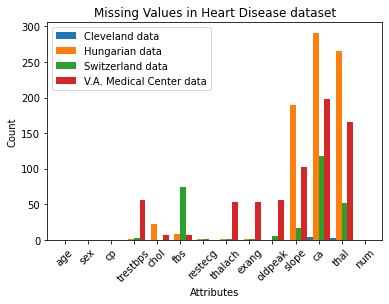

In [6]:
cleve_miss = cleve.isnull().sum()
hung_miss = hung.isnull().sum()
swiss_miss = swiss.isnull().sum()
va_miss = va.isnull().sum()

miss = pd.concat([cleve_miss, hung_miss, swiss_miss, va_miss], axis=1, keys=["Cleveland data", "Hungarian data", 
                                                                            "Switzerland data", "V.A. Medical Center data"])

missplot = miss.plot.bar(rot=45, width=1, title='Missing Values in Heart Disease dataset', xlabel='Attributes', ylabel='Count')

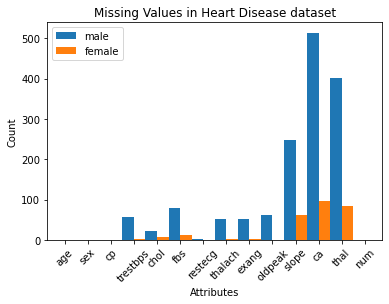

In [7]:
# visualize missing values between male and female
data_male = data[data['sex'] == 1]
data_female = data[data['sex'] == 0]

data_male_miss = data_male.isnull().sum()
data_female_miss = data_female.isnull().sum()

sex_miss = pd.concat([data_male_miss, data_female_miss], axis=1, keys=["male", "female"])

missplot = sex_miss.plot.bar(rot=45, width=1, title='Missing Values in Heart Disease dataset', xlabel='Attributes', ylabel='Count')

In [8]:
# calculate means for each continuous variable for both male and female
means_male = data_male.mean()
means_female = data_female.mean()

means = pd.DataFrame([means_male, means_female])
means.index = ['male', 'female']
means = means.drop(['age','sex','cp','fbs', 'restecg','exang','slope','thal','num','ca'], axis=1)
means

,trestbps,chol,thalach,oldpeak
male,132.143498,187.864865,135.063893,0.939850
female,132.093750,241.481283,146.244792,0.668394


In [9]:
# delete variables where is no difference in male and female
data_imp = data.copy()
data_imp = data_imp.drop(columns=['trestbps'])

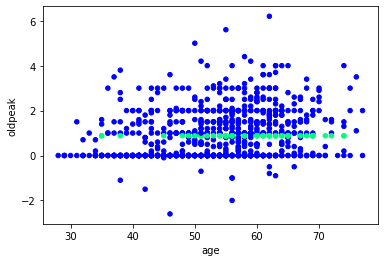

In [22]:
# mean imputation
data_imp['chol'] = data_imp['chol'].fillna(data_imp['chol'].mean())
data_imp['thalach'] = data_imp['thalach'].fillna(data_imp['thalach'].mean())
data_imp['oldpeak'] = data_imp['oldpeak'].fillna(data_imp['oldpeak'].mean())
null_values = data['oldpeak'].isnull()
# visualize results
plot = data_imp.plot(x='age', y='oldpeak', c=null_values, cmap='winter', kind='scatter', colorbar=False)

In [11]:
# calculate modes for each categorial variable for both male and female
modes_male = data_male.mode().iloc[0]
modes_female = data_female.mode().iloc[0]

modes = pd.DataFrame([modes_male, modes_female])
modes.index = ['male', 'female']
modes = modes.drop(['age','sex','trestbps','chol','thalach','oldpeak','num'], axis=1)
modes

,cp,fbs,restecg,exang,slope,ca,thal
male,4.0,0.0,0.0,0.0,2.0,0.0,7.0
female,4.0,0.0,0.0,0.0,2.0,0.0,3.0


In [12]:
# delete variables where is no difference in male and female
data_imp = data_imp.drop(columns=['cp','fbs','restecg','exang','slope','ca'])

,age,sex,chol,thalach,oldpeak,thal,num
0,63.0,1.0,233.0,150.000000,2.300000,6.0,0.0
1,67.0,1.0,286.0,108.000000,1.500000,3.0,2.0
2,67.0,1.0,229.0,129.000000,2.600000,7.0,1.0
3,37.0,1.0,250.0,187.000000,3.500000,3.0,0.0
4,41.0,0.0,204.0,172.000000,1.400000,3.0,0.0
...,...,...,...,...,...,...,...
195,54.0,0.0,333.0,154.000000,0.000000,NaN,1.0
196,62.0,1.0,139.0,137.545665,0.878788,NaN,0.0
197,55.0,1.0,223.0,100.000000,0.000000,6.0,2.0
198,58.0,1.0,385.0,137.545665,0.878788,NaN,0.0


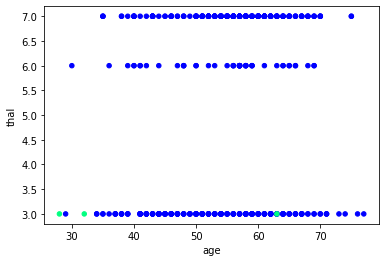

In [24]:
# mode imputation
data_imp['thal'] = data_imp['thal'].fillna(data_imp['thal'].mode())
null_values = data['thal'].isnull()

# visualize results
plot = data_imp.plot(x='age', y='thal', c=null_values, cmap='winter', kind='scatter', colorbar=False)
data_imp

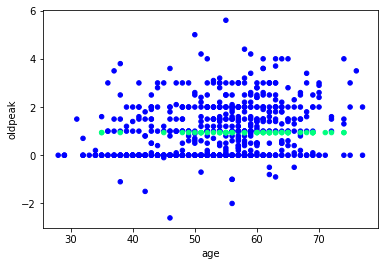

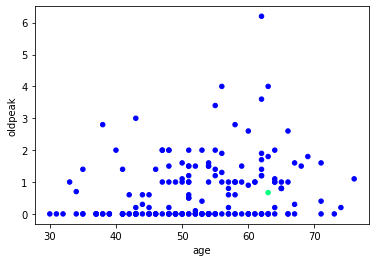

In [14]:
# mean imputation for subgroups
data_imp_male = data[data['sex']==1].copy()
data_imp_female = data[data['sex']==0].copy()

data_imp_male['oldpeak'] = data_imp_male['oldpeak'].fillna(data_imp_male['oldpeak'].mean())
data_imp_female['oldpeak'] = data_imp_female['oldpeak'].fillna(data_imp_female['oldpeak'].mean())

# visualize results
null_values = data[data['sex']==1].copy()['oldpeak'].isnull()
plot = data_imp_male.plot(x='age', y='oldpeak', c=null_values, cmap='winter', kind='scatter', colorbar=False)

null_values = data[data['sex']==0].copy()['oldpeak'].isnull()
plot = data_imp_female.plot(x='age', y='oldpeak', c=null_values, cmap='winter', kind='scatter', colorbar=False)

In [15]:
d1 = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d1)
d2 = {'col1': [1, 2], 'col2': [3, 4]}
df2 = pd.DataFrame(data=d2)
pd.concat([df1, df2])

,col1,col2
0,1,3
1,2,4
0,1,3
1,2,4
